## Project name: PY sales optimizer
## Step 5 - Consolidation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import statsmodels.api
import statsmodels.formula.api as smf
from scipy import stats
from scipy.spatial.distance import cdist
#from yellowbrick.cluster import SilhouetteVisualizer


from sklearn.pipeline import make_pipeline

seed = 100

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pakistan Largest Ecommerce Dataset.csv");

## Main results from Step 1: Data Assessment & Feature Engineering

In [3]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

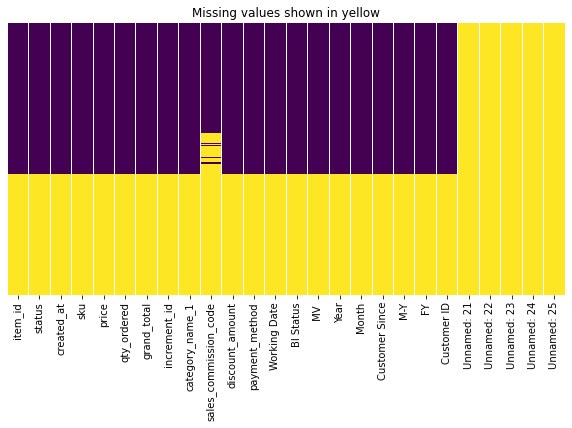

In [4]:
df.info()
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Missing values shown in yellow");

In [5]:
#Drop na
df.dropna(axis=0,how='all',inplace=True)
df.dropna(axis=1,how='all',inplace=True)
df.dropna(axis=0,how='any',inplace=True, subset=['Customer ID'])

In [6]:
# Test duplicates
df[df.duplicated()==True].index

Int64Index([], dtype='int64')

In [7]:
print(df.shape)

(584513, 21)


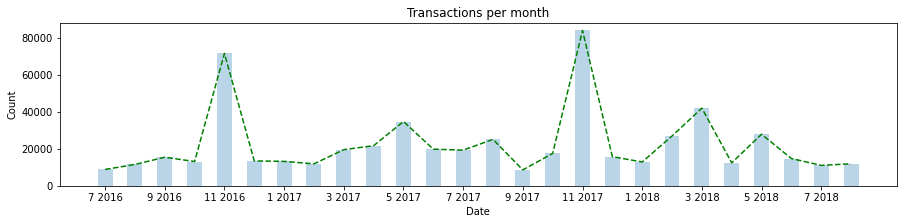

In [8]:
# Transactions per month

def get_month (date):
  return date.split("/")[0]
month=df["created_at"].apply(get_month)

def get_year (date):
  return date.split("/")[2]
year=df["created_at"].apply(get_year)


w=[8837,11535,15433,13124,71528,13452,
   13195,11861,19534,21678,34736,19793,19275,25083,8591,17499,83928,15747,
   12872,26916,41955,12413,27867,14737,11039,11896]
x=['7 2016','9 2016', '11 2016',
   '1 2017', '3 2017', '5 2017','7 2017','9 2017', '11 2017',
    '1 2018','3 2018', '5 2018', '7 2018']


v=df["category_name_1"].value_counts().index

mat=np.zeros(shape=(16,26))

plt.figure(figsize=(15,3))
plt.bar(range(0,26),w,width=0.5,alpha=0.3)
plt.plot(range(0,26),w,"g--")
plt.xticks(range(0,26,2),x)
plt.title("Transactions per month")
plt.xlabel("Date")
plt.ylabel("Count");


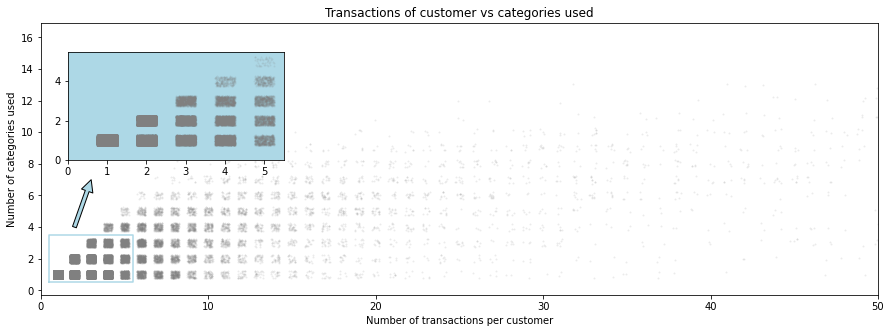

In [9]:
# Transactions per customer 

def func (x):
  return len(np.unique(x))
test=df[df["status"]=="complete"]

a=test.groupby("Customer ID").agg({"item_id" : "count", "category_name_1":func})
v=np.arange(-0.25,0.25,0.001)
w=np.arange(-0.25,0.25,0.001)
b=np.random.choice(v,len(a))
e=np.random.choice(w,len(a))
c=a["category_name_1"]+b
d=a["item_id"]+e

plt.figure(figsize=(15,5))
plt.scatter(d,c,s=2,alpha=0.1,marker="*",color="grey")
plt.annotate("",xy=(3,7),xytext=(2,4),arrowprops={"facecolor":"lightblue"})
plt.xlim([0,50])
plt.xlabel("Number of transactions per customer")
plt.ylabel("Number of categories used")
plt.title("Transactions of customer vs categories used")
plt.plot([0.5,0.5,5.5,5.5,0.5],[0.5,3.5,3.5,0.5,0.5],"lightblue")
plt.axes([0.15,0.5,0.2,0.3],facecolor="lightblue")
plt.scatter(d,c,s=2,alpha=0.1,marker="*",color="grey")
plt.xlim([0,5.5])
plt.ylim([0,5.5]);

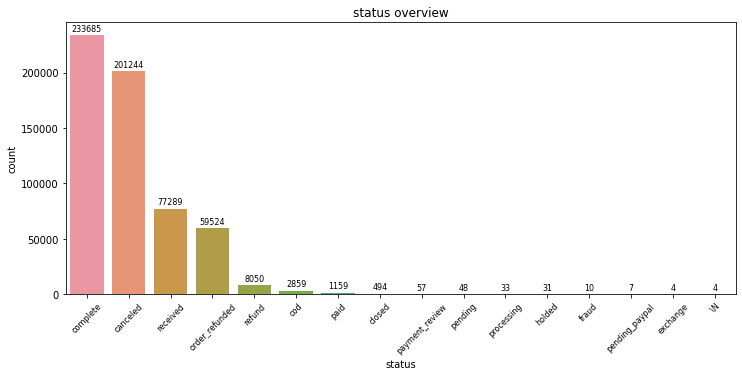

In [10]:
# Status and BI status

fig, ax1 = plt.subplots(figsize=(12,5))
graph=sns.countplot(ax=ax1, x=df["status"], order=df['status'].value_counts(ascending=False).index)
plt.xticks(fontsize=8,rotation=45)
plt.title("status overview");
for p in graph.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height + 4000,height,ha="center",fontsize=8)

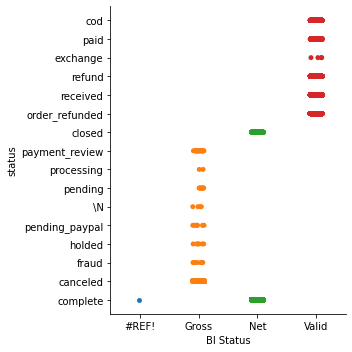

In [11]:
sns.catplot(x="BI Status",y="status",data=df.dropna(axis=0,how="any"));

In [12]:
# Further feature engeneering
df["BI Status"]=df["BI Status"].replace(to_replace=['#REF!'],value=["Net"])
df['BIstatus_num'] = df['BI Status']
df['BIstatus_num'] = df['BIstatus_num'].replace(['Net'], 1)
df['BIstatus_num'] = df['BIstatus_num'].replace(['Valid'], 0)
df['BIstatus_num'] = df['BIstatus_num'].replace(['Gross'], -1)

df['status_new'] = df['status']
df['status_new'] = df['status_new'].replace(['order_refunded', 'refund'],'refunded')
df['status_new'] = df['status_new'].replace(['complete', 'closed'],'completed')
df['status_new'] = df['status_new'].replace(['paid','received','cod',"exchange"],'processing')
df['status_new'] = df['status_new'].replace(['holded','pending_paypal','payment_review'],'pending')

In [13]:
# Desciption of numeric variables
df.loc[:,('price', 'qty_ordered', 'grand_total', 'discount_amount')].describe()

,price,qty_ordered,grand_total,discount_amount
count,5.845130e+05,584513.000000,5.845130e+05,584513.000000
mean,6.348821e+03,1.296375,8.530676e+03,499.502175
std,1.494940e+04,3.996094,6.132138e+04,1506.955668
min,0.000000e+00,1.000000,-1.594000e+03,-599.500000
25%,3.600000e+02,1.000000,9.450000e+02,0.000000
50%,8.990000e+02,1.000000,1.960400e+03,0.000000
75%,4.070000e+03,1.000000,6.999000e+03,160.520000
max,1.012626e+06,1000.000000,1.788800e+07,90300.000000


In [14]:
df=df[df["price"]>0]
df=df[df["grand_total"]>0]

In [15]:
df["total_price"]=df["qty_ordered"]*df["price"]
test=df.groupby(["increment_id"]).agg({"grand_total":"mean" ,"discount_amount":"mean","total_price":"sum" })
test["neu"]=(test["total_price"]-test["discount_amount"])-test["grand_total"]
len(test[test["neu"]!=0])/len(test)*100

22.256019395484177

In [16]:
# Adjusted grand total and discount amount
df['discount_rate'] = (df['discount_amount']/(df['grand_total'] + df['discount_amount']) * 100).round(2)
df['grand_item']=df['price']*df["qty_ordered"]*(1-df['discount_rate']/100)

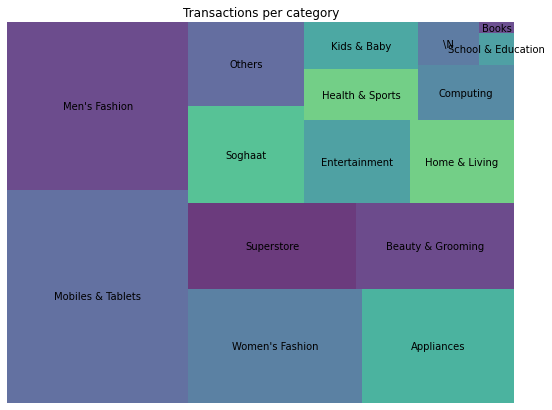

In [17]:
# Categories
!pip install squarify
import squarify

test= pd.DataFrame(df["category_name_1"].value_counts())
test=test.reset_index()
test

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
squarify.plot(sizes=test["category_name_1"], label=test["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per category");

In [18]:
df=df[df["category_name_1"]!='\\N']

In [19]:
#Sales Commission Code
df["sales_commission_code"].value_counts()

\N               326302
40968              2701
C-LHW-50074        2374
C-RWP-31924        1666
cisb30211          1562
                  ...  
1703                  1
150                   1
45593                 1
50243                 1
cc-isb-102715         1
Name: sales_commission_code, Length: 7003, dtype: int64

In [20]:
df=df.drop(["sales_commission_code"],axis=1)

In [21]:
#Payment method
print(df["payment_method"].value_counts(normalize=True))

cod                  0.467966
Payaxis              0.170124
Easypay              0.146070
jazzwallet           0.060695
easypay_voucher      0.054936
bankalfalah          0.040594
jazzvoucher          0.026625
Easypay_MA           0.024625
apg                  0.003111
ublcreditcard        0.001462
mygateway            0.001124
mcblite              0.000943
cashatdoorstep       0.000821
internetbanking      0.000779
customercredit       0.000088
financesettlement    0.000027
marketingexpense     0.000011
Name: payment_method, dtype: float64


In [22]:
df['payment_method'].replace(['Easypay_MA','easypay_voucher'],'Easypay',inplace=True)
df['payment_method'].replace(['jazzwallet','jazzvoucher'],'Jazz',inplace=True)
df['payment_method'].replace(['customercredit','ublcreditcard'],'Credit',inplace=True)
df['payment_method'].replace(['internetbanking'],'bankalfalah',inplace=True)

In [23]:
# New variable of special intrest: Lifetime
df['Working Date2'] = pd.to_datetime(df['Working Date'])
base = df['Working Date2'].max()
df['Date'] = df['Working Date2'].apply(lambda x: x.date())
df['Customer_Since_Date'] = df.groupby('Customer ID')['Date'].transform(min)
df['Lifetime'] = (base.date() - df['Customer_Since_Date']).astype('timedelta64[D]') + 1

In [24]:
# Delete remaining "na" 
df=df.dropna(axis=0,how="any")

## Main results from Step 2: RFM-Score and "best" Baseline Model

In [25]:
#Only focus on positive/"promissing" transactions 
df=df[(df["status_new"]=="completed")|(df["status_new"]=="processing")]


In [26]:
print("Z score = (x-mean)/standard deviation = 3, gives 99.7% of the data points lie between +/- standard deviation. We use this statistics concept to remove outliers!")

Z score = (x-mean)/standard deviation = 3, gives 99.7% of the data points lie between +/- standard deviation. We use this statistics concept to remove outliers!


In [27]:
#Delete outliers in attributes relevant for RFM-score calculation

#Number of orders (for Frequency)
T1=df.groupby(["Customer ID"]).agg({"increment_id":"count"})
m1=T1["increment_id"].mean()
s1=T1["increment_id"].std()
A1=T1[T1["increment_id"]<=m1+3*s1]
a1=A1.index
lis=[]
for id in df["Customer ID"]:
  lis.append(id in a1)

df1=df.iloc[lis]


# price, qty_ordered, discount_rate (for Monetary)
zpmax=df["price"].mean()+3*df["price"].std()
zpmin=df["price"].mean()-3*df["price"].std()
data=df1[(df1["price"]>=zpmin) & (df1["price"]<=zpmax)]

zqmax=data["qty_ordered"].mean()+3*data["qty_ordered"].std()
zqmin=data["qty_ordered"].mean()-3*data["qty_ordered"].std()
data=data[(data["qty_ordered"]>=zqmin) & (data["qty_ordered"]<=zqmax)]

zdmax=data["discount_rate"].mean()+3*data["discount_rate"].std()
zdmin=data["discount_rate"].mean()-3*data["discount_rate"].std()
data=data[(data["discount_rate"]>=zdmin) & (data["discount_rate"]<=zdmax)]

In [28]:
# Calculate RFM-scores:

# Recency: Days since last purchase

data['Working Date'] = pd.to_datetime(data['Working Date'])
base = data['Working Date'].max()
data['Date'] = data['Working Date'].apply(lambda x: x.date())
data['Most_Recent_Purchase'] = data.groupby('Customer ID')['Date'].transform(max)
data['Recency'] = (base.date() - data['Most_Recent_Purchase']).astype('timedelta64[D]')

# Frequency: Total number of purchases
data['Frequency'] = data.groupby('Customer ID')['increment_id'].transform('nunique')

# Monetary: Total amount spend
data['Monetary'] = data.groupby('Customer ID')['grand_item'].transform('sum')

#RFM table
RFM_abs= data[['Customer ID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()
RFM_abs.head()

,Customer ID,Recency,Frequency,Monetary
0,1.0,788.0,1,1950.0
7,6.0,788.0,1,170.0
10,9.0,788.0,1,5500.0
11,10.0,788.0,1,366.0
13,11.0,560.0,4,945.0


In [29]:
# Baseline Model 
RFM=RFM_abs.copy().drop(["Customer ID"],axis=1)
scaler=preprocessing.MinMaxScaler().fit(RFM)
RFM=scaler.transform(RFM)

In [30]:
range_n_cluster = [2,3,4,5,6,7,8,9,10,11,12]
ssd = []
distortions = []
for i in range_n_cluster:
    kmeans = KMeans(n_clusters = i, random_state=seed)
    kmeans.fit(RFM)
    ssd.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(RFM, kmeans.cluster_centers_, 'euclidean'), axis=1)) / np.size(RFM, axis = 0))

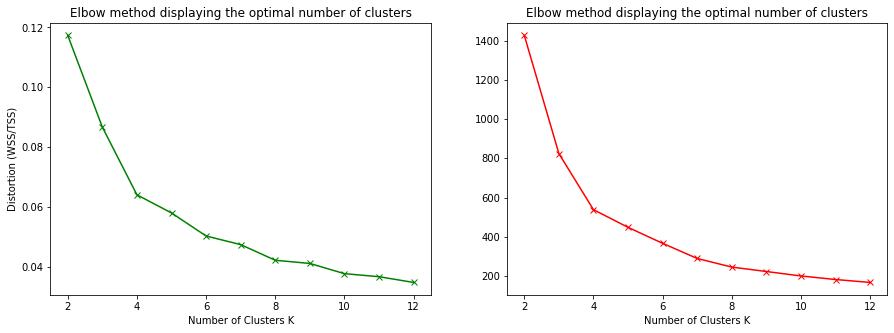

In [31]:
# Plotting the distortion as a function of the number of clusters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range_n_cluster, distortions, 'gx-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Elbow method displaying the optimal number of clusters');

plt.subplot(1,2,2)
plt.plot(range_n_cluster, ssd, 'rx-')
plt.xlabel('Number of Clusters K')
plt.title('Elbow method displaying the optimal number of clusters');

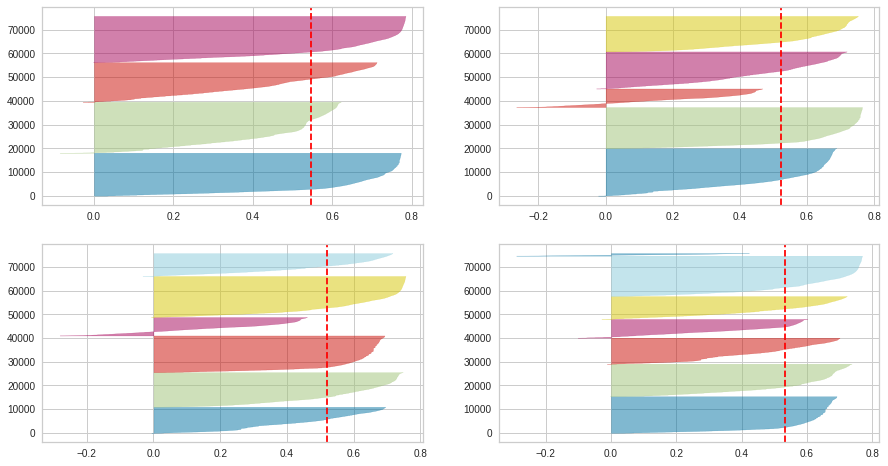

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [4, 5, 6, 7]:
    km = KMeans(n_clusters = i, n_init=10, max_iter=100, random_state=seed)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(RFM)

# note: this step takes about 30mins

In [34]:
kmeans=KMeans(n_clusters=4, random_state = seed)
kmeans.fit(RFM)
silhouette_score(RFM,kmeans.labels_,metric="sqeuclidean")

0.6743543307993832

In [35]:
RFM_res = RFM_abs.copy()
RFM_res['Cluster1'] = kmeans.labels_
RFM_res.head()

,Customer ID,Recency,Frequency,Monetary,Cluster1
0,1.0,788.0,1,1950.0,0
7,6.0,788.0,1,170.0,0
10,9.0,788.0,1,5500.0,0
11,10.0,788.0,1,366.0,0
13,11.0,560.0,4,945.0,2


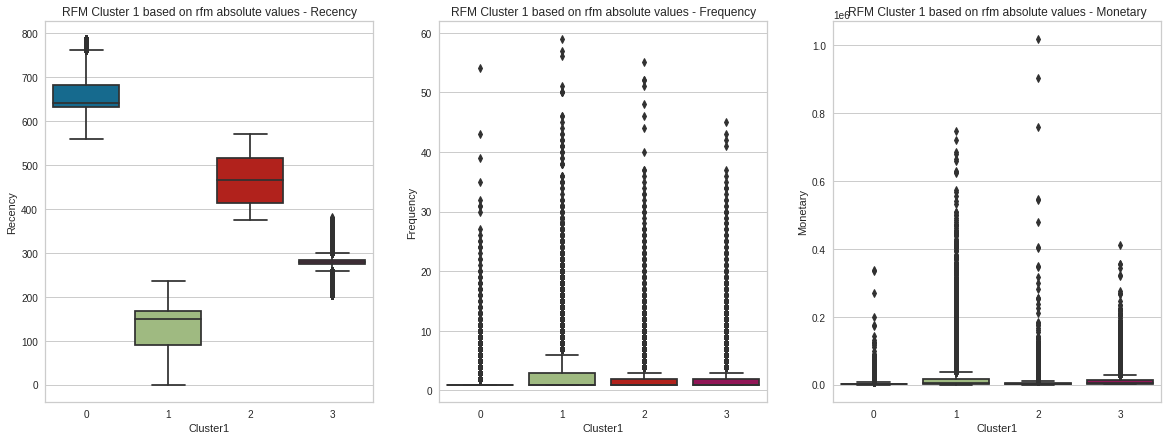

In [36]:
# Model interpretation

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(x = 'Cluster1', y='Recency', data=RFM_res)

plt.ylabel('Recency')
plt.title('RFM Cluster 1 based on rfm absolute values - Recency')

plt.subplot(1,3,2)
sns.boxplot(x = 'Cluster1', y='Frequency', data=RFM_res)

plt.ylabel('Frequency')
plt.title('RFM Cluster 1 based on rfm absolute values - Frequency')

plt.subplot(1,3,3)
sns.boxplot(x = 'Cluster1', y='Monetary', data=RFM_res)

plt.ylabel('Monetary')
plt.title('RFM Cluster 1 based on rfm absolute values - Monetary');


In [37]:
import plotly.express as px

RFMp=RFM_res.drop(["Cluster1"],axis=1)
fig = px.scatter_3d(RFMp, x="Frequency", y="Monetary", z="Recency",labels=RFM_res["Cluster1"], color=RFM_res["Cluster1"])

fig = fig.update_traces(marker=dict(size=2,
                              line=dict(width=2,
                                        color=RFM_res["Cluster1"])),
                  selector=dict(mode='markers'))

fig.layout.showlegend = True
fig.show()

## Main results from Step 3: Model improvement


In [38]:
RFM_abs1=RFM_abs[(RFM_abs["Frequency"]==1)& (RFM_abs["Monetary"]<=30000)]
RFM=RFM_abs1.copy().drop(["Customer ID","Frequency"],axis=1)
scaler=preprocessing.MinMaxScaler().fit(RFM)
RFM=scaler.transform(RFM)

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth=estimate_bandwidth(RFM, quantile=0.18)
cluster=MeanShift(bandwidth=bandwidth)
cluster.fit(RFM)


MeanShift(bandwidth=0.1692244948823385)

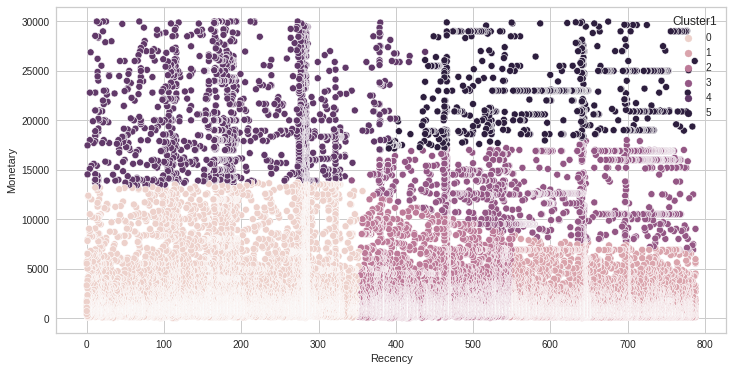

In [39]:
RFM_res = RFM_abs1.copy()
RFM_res['Cluster1'] =cluster.labels_
RFM_one=RFM_res
plt.figure(figsize=(12,6))
sns.scatterplot(RFM_res["Recency"],RFM_res["Monetary"], hue=RFM_res["Cluster1"]);

In [40]:
silhouette_score(RFM,cluster.labels_,metric="sqeuclidean")

0.6457551758846684

In [44]:
RFM_abs1=RFM_abs[(RFM_abs["Frequency"]!=1)&(RFM_abs["Monetary"]<=250000)&(RFM_abs["Frequency"]<=20)]

RFM=RFM_abs1.copy().drop(["Customer ID"],axis=1)
scaler=preprocessing.MinMaxScaler().fit(RFM)
RFM=scaler.transform(RFM)

kmeans=KMeans(n_clusters=5, random_state = seed)
kmeans.fit(RFM)
# add now the predicted cluster to the RFM table
RFM_res = RFM_abs1.copy()
RFM_res['Cluster1'] = kmeans.labels_
RFM_rep=RFM_res

RFMp=RFM_res.drop(["Cluster1"],axis=1)
fig = px.scatter_3d(RFMp, x="Frequency", y="Monetary", z="Recency",labels=RFM_res["Cluster1"], color=RFM_res["Cluster1"])

fig = fig.update_traces(marker=dict(size=2,
                              line=dict(width=2,
                                        color=RFM_res["Cluster1"])),
                  selector=dict(mode='markers'))

fig.layout.showlegend = True
fig.show()


In [42]:
silhouette_score(RFM,kmeans.labels_,metric="sqeuclidean")

0.5665840156608279

## Step 4: Target Clusters and Marketing Strategy 

##WHO to target



In [45]:
# Proposal: Clusters for Marketing Activity 
# Cluster with low recency and/or high frequency as they tend to show higher likelihood to respond to marketing activities (see literature) 
# Additional cluster under focus with especially high monetary values as they are of special intrest/relevance for company

C1=RFM_one[RFM_one["Cluster1"]==0]
C2=RFM_one[RFM_one["Cluster1"]==4]
C3=RFM_one[RFM_one["Cluster1"]==5]
C4=RFM_rep[RFM_rep["Cluster1"]==2]
C5=RFM_rep[RFM_rep["Cluster1"]==3]
C6=RFM_rep[RFM_rep["Cluster1"]==4]

In [46]:
# 45% customer reach seems to be reasonable and cluster sizes not too small

print((len(C1)+len(C2)+len(C3))/len(RFM_one)*100)
print((len(C4)+len(C5)+len(C6))/len(RFM_rep)*100)
print((len(C1)+len(C2)+len(C3)+len(C4)+len(C5)+len(C6))/(len(RFM_one)+len(RFM_rep))*100)

print(len(C1))
print(len(C2))
print(len(C3))

print(len(C4))
print(len(C5))
print(len(C6))

48.47097268729576
39.524557956778
45.436127105992746
21105
2170
754
1390
7295
1374


In [47]:
#Sub-samples
list1=[]
for id in data["Customer ID"]:
  list1.append(id in np.array(C1["Customer ID"]))
Sub1=data.loc[list1]

list2=[]
for id in data["Customer ID"]:
  list2.append(id in np.array(C2["Customer ID"]))
Sub2=data.loc[list2]

list3=[]
for id in data["Customer ID"]:
  list3.append(id in np.array(C3["Customer ID"]))
Sub3=data.loc[list3]

list4=[]
for id in data["Customer ID"]:
  list4.append(id in np.array(C4["Customer ID"]))
Sub4=data.loc[list4]

list5=[]
for id in data["Customer ID"]:
  list5.append(id in np.array(C5["Customer ID"]))
Sub5=data.loc[list5]

list6=[]
for id in data["Customer ID"]:
  list6.append(id in np.array(C6["Customer ID"]))
Sub6=data.loc[list6]

## HOW to target (offer: product and discount)

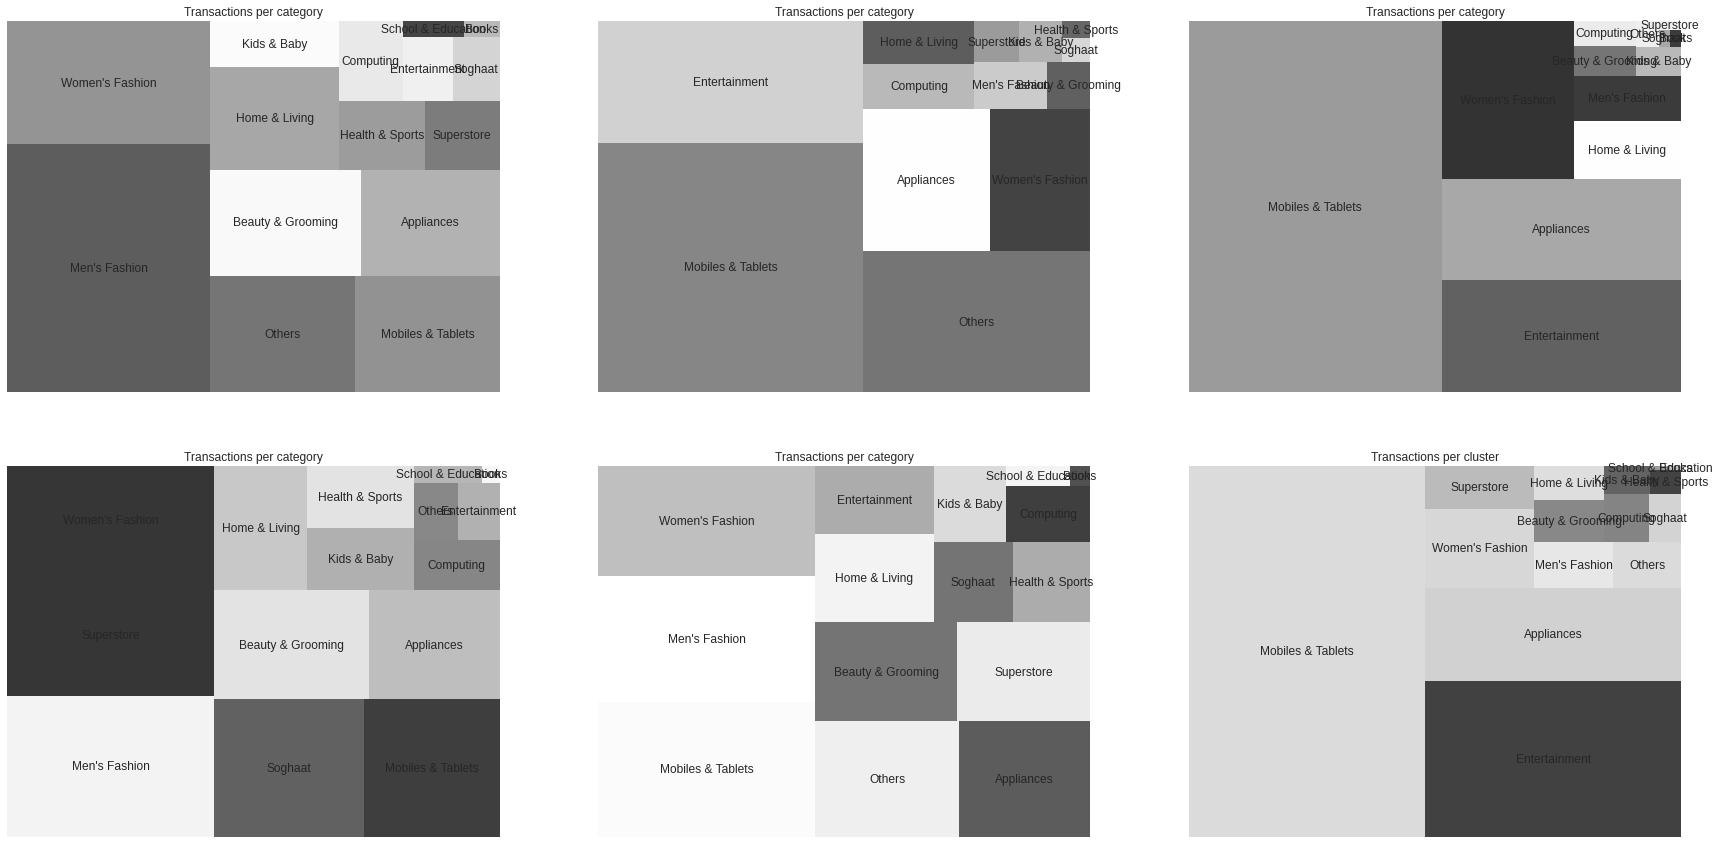

In [50]:

!pip install squarify
import squarify

test1= pd.DataFrame(Sub1["category_name_1"].value_counts())
test1=test1.reset_index()

test2= pd.DataFrame(Sub2["category_name_1"].value_counts())
test2=test2.reset_index()

test3= pd.DataFrame(Sub3["category_name_1"].value_counts())
test3=test3.reset_index()

test4= pd.DataFrame(Sub4["category_name_1"].value_counts())
test4=test4.reset_index()

test5= pd.DataFrame(Sub5["category_name_1"].value_counts())
test5=test5.reset_index()

test6= pd.DataFrame(Sub6["category_name_1"].value_counts())
test6=test6.reset_index()

plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
squarify.plot(sizes=test1["category_name_1"], label=test1["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per category")

plt.subplot(2,3,2)
squarify.plot(sizes=test2["category_name_1"], label=test2["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per category")

plt.subplot(2,3,3)
squarify.plot(sizes=test3["category_name_1"], label=test3["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per category")

plt.subplot(2,3,4)
squarify.plot(sizes=test4["category_name_1"], label=test4["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per category");


plt.subplot(2,3,5)
squarify.plot(sizes=test5["category_name_1"], label=test5["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per category");

plt.subplot(2,3,6)
squarify.plot(sizes=test6["category_name_1"], label=test6["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per cluster");


In [51]:
fill=np.zeros(shape=(6,8))
index=["Cluster1","Cluster2","Cluster3","Cluster4","Cluster5","Cluster6"]
#overview=pd.DataFrame(fill,columns=["AR","AF","AM","RpO","DpO","CpO","CpC"],index=index)
overview=pd.DataFrame(fill,columns=["Rec. per Cust","Freq. per Cust","Monetary per Cust","Revenue per Order","Disocunt per Order ","Categories per Order ","Categories per Customer","Name"],index=index)

In [52]:
# Cluster desciptions / KPIs

#Cluster 1
Average_Recency=C1["Recency"].mean()
Average_Frequency=C1["Frequency"].mean()
Average_Monetary=C1["Monetary"].mean()
group1=Sub1.groupby("increment_id").agg({"grand_item":"sum","discount_rate":"mean","item_id":"count","category_name_1":"nunique"})
Revenue_per_Order= group1["grand_item"].mean()
Discount_per_Order= group1["discount_rate"].mean()
Categories_per_Order= group1["category_name_1"].mean()
group11=Sub1.groupby("Customer ID").agg({"category_name_1":"nunique"})
Categories_per_Customer= group11["category_name_1"].mean()

overview.iloc[0,0]= np.round(Average_Recency,1)
overview.iloc[0,1]= np.round(Average_Frequency,1)
overview.iloc[0,2]= np.round(Average_Monetary,1)
overview.iloc[0,3]= np.round(Revenue_per_Order,1)
overview.iloc[0,4]= np.round(Discount_per_Order,1)
overview.iloc[0,5]= np.round(Categories_per_Order,1)
overview.iloc[0,6]= np.round(Categories_per_Customer,1)

In [53]:
#Cluster 2
Average_Recency=C2["Recency"].mean()
Average_Frequency=C2["Frequency"].mean()
Average_Monetary=C2["Monetary"].mean()
group2=Sub2.groupby("increment_id").agg({"grand_item":"sum","discount_rate":"mean","item_id":"count","category_name_1":"nunique"})
Revenue_per_Order= group2["grand_item"].mean()
Discount_per_Order= group2["discount_rate"].mean()
Categories_per_Order= group2["category_name_1"].mean()
group22=Sub2.groupby("Customer ID").agg({"category_name_1":"nunique"})
Categories_per_Customer= group22["category_name_1"].mean()

overview.iloc[1,0]= np.round(Average_Recency,1)
overview.iloc[1,1]= np.round(Average_Frequency,1)
overview.iloc[1,2]= np.round(Average_Monetary,1)
overview.iloc[1,3]= np.round(Revenue_per_Order,1)
overview.iloc[1,4]= np.round(Discount_per_Order,1)
overview.iloc[1,5]= np.round(Categories_per_Order,1)
overview.iloc[1,6]= np.round(Categories_per_Customer,1)

In [55]:
#Cluster 3
Average_Recency=C3["Recency"].mean()
Average_Frequency=C3["Frequency"].mean()
Average_Monetary=C3["Monetary"].mean()
group3=Sub3.groupby("increment_id").agg({"grand_item":"sum","discount_rate":"mean","item_id":"count","category_name_1":"nunique"})
Revenue_per_Order= group3["grand_item"].mean()
Discount_per_Order= group3["discount_rate"].mean()
Categories_per_Order= group3["category_name_1"].mean()
group33=Sub3.groupby("Customer ID").agg({"category_name_1":"nunique"})
Categories_per_Customer= group33["category_name_1"].mean()

overview.iloc[2,0]= np.round(Average_Recency,1)
overview.iloc[2,1]= np.round(Average_Frequency,1)
overview.iloc[2,2]= np.round(Average_Monetary,1)
overview.iloc[2,3]= np.round(Revenue_per_Order,1)
overview.iloc[2,4]= np.round(Discount_per_Order,1)
overview.iloc[2,5]= np.round(Categories_per_Order,1)
overview.iloc[2,6]= np.round(Categories_per_Customer,1)

In [56]:
#Cluster 4
Average_Recency=C4["Recency"].mean()
Average_Frequency=C4["Frequency"].mean()
Average_Monetary=C4["Monetary"].mean()
group4=Sub4.groupby("increment_id").agg({"grand_item":"sum","discount_rate":"mean","item_id":"count","category_name_1":"nunique"})
Revenue_per_Order= group4["grand_item"].mean()
Discount_per_Order= group4["discount_rate"].mean()
Categories_per_Order= group4["category_name_1"].mean()
group44=Sub4.groupby("Customer ID").agg({"category_name_1":"nunique"})
Categories_per_Customer= group44["category_name_1"].mean()

overview.iloc[3,0]= np.round(Average_Recency,1)
overview.iloc[3,1]= np.round(Average_Frequency,1)
overview.iloc[3,2]= np.round(Average_Monetary,1)
overview.iloc[3,3]= np.round(Revenue_per_Order,1)
overview.iloc[3,4]= np.round(Discount_per_Order,1)
overview.iloc[3,5]= np.round(Categories_per_Order,1)
overview.iloc[3,6]= np.round(Categories_per_Customer,1)

In [57]:
#Cluster 5
Average_Recency=C5["Recency"].mean()
Average_Frequency=C5["Frequency"].mean()
Average_Monetary=C5["Monetary"].mean()
group5=Sub5.groupby("increment_id").agg({"grand_item":"sum","discount_rate":"mean","item_id":"count","category_name_1":"nunique"})
Revenue_per_Order= group5["grand_item"].mean()
Discount_per_Order= group5["discount_rate"].mean()
Categories_per_Order= group5["category_name_1"].mean()
group55=Sub5.groupby("Customer ID").agg({"category_name_1":"nunique"})
Categories_per_Customer= group55["category_name_1"].mean()

overview.iloc[4,0]= np.round(Average_Recency,1)
overview.iloc[4,1]= np.round(Average_Frequency,1)
overview.iloc[4,2]= np.round(Average_Monetary,1)
overview.iloc[4,3]= np.round(Revenue_per_Order,1)
overview.iloc[4,4]= np.round(Discount_per_Order,1)
overview.iloc[4,5]= np.round(Categories_per_Order,1)
overview.iloc[4,6]= np.round(Categories_per_Customer,1)

In [58]:
#Cluster 6
Average_Recency=C6["Recency"].mean()
Average_Frequency=C6["Frequency"].mean()
Average_Monetary=C6["Monetary"].mean()
group6=Sub6.groupby("increment_id").agg({"grand_item":"sum","discount_rate":"mean","item_id":"count","category_name_1":"nunique"})
Revenue_per_Order= group6["grand_item"].mean()
Discount_per_Order= group6["discount_rate"].mean()
Categories_per_Order= group6["category_name_1"].mean()
group66=Sub6.groupby("Customer ID").agg({"category_name_1":"nunique"})
Categories_per_Customer= group66["category_name_1"].mean()

overview.iloc[5,0]= np.round(Average_Recency,1)
overview.iloc[5,1]= np.round(Average_Frequency,1)
overview.iloc[5,2]= np.round(Average_Monetary,1)
overview.iloc[5,3]= np.round(Revenue_per_Order,1)
overview.iloc[5,4]= np.round(Discount_per_Order,1)
overview.iloc[5,5]= np.round(Categories_per_Order,1)
overview.iloc[5,6]= np.round(Categories_per_Customer,1)

In [59]:
overview.iloc[0,7]= "Up-seller"
overview.iloc[1,7]= "Keepers"
overview.iloc[2,7]= "Re-Activaters"
overview.iloc[3,7]= "Loyal-Shoppers"
overview.iloc[4,7]= "High-Potentials"
overview.iloc[5,7]= "Top Group"

overview

,Rec. per Cust,Freq. per Cust,Monetary per Cust,Revenue per Order,Disocunt per Order,Categories per Order,Categories per Customer,Name
Cluster1,200.6,1.0,2620.3,2620.3,2.2,1.1,1.1,Up-seller
Cluster2,207.8,1.0,20287.4,20287.4,6.3,1.1,1.1,Keepers
Cluster3,587.3,1.0,22526.7,22526.7,3.3,1.1,1.1,Re-Activaters
Cluster4,234.9,12.1,31613.1,2602.8,6.7,1.2,5.4,Loyal-Shoppers
Cluster5,122.9,3.1,16542.1,5363.6,5.6,1.2,2.0,High-Potentials
Cluster6,167.7,7.5,122595.1,16393.7,12.5,1.0,1.8,Top Group


In [60]:
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pakistan Largest Ecommerce Dataset.csv")
df2.dropna(axis=0,how='all',inplace=True)
df2.dropna(axis=1,how='all',inplace=True)
df2.dropna(axis=0,how='any',inplace=True, subset=['Customer ID'])
df2["BI Status"]=df2["BI Status"].replace(to_replace=['#REF!'],value=["Net"])
df2['BIstatus_num'] = df2['BI Status']
df2['BIstatus_num'] = df2['BIstatus_num'].replace(['Net'], 1)
df2['BIstatus_num'] = df2['BIstatus_num'].replace(['Valid'], 0)
df2['BIstatus_num'] = df2['BIstatus_num'].replace(['Gross'], -1)
df2['status_new'] = df2['status']
df2['status_new'] = df2['status_new'].replace(['order_refunded', 'refund'],'refunded')
df2['status_new'] = df2['status_new'].replace(['complete', 'closed'],'completed')
df2['status_new'] = df2['status_new'].replace(['paid','received','cod',"exchange"],'processing')
df2['status_new'] = df2['status_new'].replace(['holded','pending_paypal','payment_review'],'pending')
df2=df2[df2["price"]>0]
df2=df2[df2["grand_total"]>0]
df2['discount_rate'] = (df2['discount_amount']/(df2['grand_total'] + df2['discount_amount']) * 100).round(2)
df2['grand_item']=df2['price']*df2["qty_ordered"]*(1-df2['discount_rate']/100)
df2=df2[df2["category_name_1"]!='\\N']
df2=df2.drop(["sales_commission_code"],axis=1)
df2=df2.dropna(axis=0,how="any")

In [61]:
Gd=df2.groupby(["increment_id"]).agg({"discount_rate":"mean","BIstatus_num":np.unique})
Gd["l"]=pd.cut(Gd["discount_rate"],bins=[-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
          labels=["l1","l2","l3","l4","l5","l6","l7","l8","l9","l10","l11","l12","l13","l14","l15","l16","l17","l18","l19","l20","l21"])
res=[]
for i in ["l1","l2","l3","l4","l5","l6","l7","l8","l9","l10","l11","l12","l13","l14","l15","l16","l17","l18","l19","l20","l21"]:
  a=len(Gd[(Gd["BIstatus_num"]==1)&(Gd["l"]==i)])/len(Gd[Gd["l"]==i])*100
  res.append(a)

Discount=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
Share_of_completed =res

fig = px.line(x=Discount,y=Share_of_completed)
fig.update_traces(mode="markers+lines", hovertemplate=None) 
fig.update_layout(hovermode="x unified")
fig.update_layout(height=600, width=800, title_text="Share of completed/closed orders per discount-level")
fig.update_xaxes(title_text="Discount-level")
fig.update_yaxes(title_text="Share of completed orders")
fig.show();

In [62]:
neu=['Appliances', 'Entertainment', "Men's Fashion", 'Mobiles & Tablets', 'Superstore', "Women's Fashion"]
neu2=[0, 1, 2, 3, 4, 5]

x=np.zeros(shape=(21,6))
for inte,word in zip(neu2, neu):
  dfx=df2[df2["category_name_1"]==word]
  Gd=dfx.groupby(["increment_id"]).agg({"discount_rate":"mean","BIstatus_num":np.unique})
  Gd["l"]=pd.cut(Gd["discount_rate"],bins=[-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
          labels=["l1","l2","l3","l4","l5","l6","l7","l8","l9","l10","l11","l12","l13","l14","l15","l16","l17","l18","l19","l20","l21"])
  res=[]
  for i in ["l1","l2","l3","l4","l5","l6","l7","l8","l9","l10","l11","l12","l13","l14","l15","l16","l17","l18","l19","l20","l21"]:
    a=len(Gd[(Gd["BIstatus_num"]==1)&(Gd["l"]==i)])/len(Gd[Gd["l"]==i])*100
    res.append(a)
  x[:,inte]=res

In [63]:
from plotly.subplots import make_subplots
import plotly.graph_objects as gx
z=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

fig = make_subplots(rows=2, cols=3,
subplot_titles=("Appliances","Entertainment","Men's Fashion","Mobiles & Tablets", "Superstore","Women's Fashion"),
shared_xaxes=True, shared_yaxes=True)

fig.add_trace(
    gx.Scatter(x=z, y=x[:,0]),
    row=1, col=1
)

fig.add_trace(
    gx.Scatter(x=z, y=x[:,1]),
    row=1, col=2
)

fig.add_trace(
    gx.Scatter(x=z, y=x[:,2]),
    row=1, col=3
)

fig.add_trace(
    gx.Scatter(x=z, y=x[:,3]),
    row=2, col=1
)

fig.add_trace(
    gx.Scatter(x=z, y=x[:,4]),
    row=2, col=2
)

fig.add_trace(
    gx.Scatter(x=z, y=x[:,5]),
    row=2, col=3
)

fig.update_layout(height=600, width=1200, title_text="Share of completed/closed orders per discount-level")
fig.show()

##WHEN to target

In [64]:
#Time Series Analysis

#Deep dive into the clusters of part 2, to get an idea which products we could push with marketing
#most interesstings groups are group 0 and 4. both have a short recency. additionaly look deeper into group 5 (heigher recnecy but also a high monetary score)

#create CSV which contains result of cluster 1
RFM_res_merged = data.merge(right=RFM_one.reset_index(),on='Customer ID',how='left')
#RFM_res_merged = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Result_Cluster1.csv')
RFM_res_merged.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,...,Lifetime,Most_Recent_Purchase,Recency_x,Frequency_x,Monetary_x,index,Recency_y,Frequency_y,Monetary_y,Cluster1
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,...,789.0,2016-07-01,788.0,1,1950.0,0.0,788.0,1.0,1950.0,1.0
1,211139.0,complete,7/1/2016,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,0.0,...,789.0,2016-07-01,788.0,1,170.0,7.0,788.0,1.0,170.0,1.0
2,211142.0,complete,7/1/2016,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,0.0,...,789.0,2016-07-01,788.0,1,5500.0,10.0,788.0,1.0,5500.0,1.0
3,211143.0,received,7/1/2016,BK1070200PL,210.0,1.0,366.0,100147454,Soghaat,0.0,...,789.0,2016-07-01,788.0,1,366.0,11.0,788.0,1.0,366.0,1.0
4,211144.0,received,7/1/2016,BK1130200CF,156.0,1.0,366.0,100147454,Soghaat,0.0,...,789.0,2016-07-01,788.0,1,366.0,11.0,788.0,1.0,366.0,1.0


In [65]:
# RFM_res_merged.to_csv("Result_Cluster1.csv",index=False)
RFM_res_merged.to_csv("/content/drive/MyDrive/Colab Notebooks/Result_Cluster1.csv",index=False)

# RFM_res_merged_TS = pd.read_csv('Result_Cluster1.csv', index_col=2, parse_dates=[2], squeeze=True)
RFM_res_merged_TS = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Result_Cluster1.csv', index_col=2, parse_dates=[2], squeeze=True)

RFM_res_merged_TS.head(10)

,item_id,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,...,Lifetime,Most_Recent_Purchase,Recency_x,Frequency_x,Monetary_x,index,Recency_y,Frequency_y,Monetary_y,Cluster1
created_at,,,,,,,,,,,,,,,,,,,,,
2016-07-01,211131.0,complete,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,...,789.0,2016-07-01,788.0,1,1950.000,0.0,788.0,1.0,1950.0,1.0
2016-07-01,211139.0,complete,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,0.0,cod,...,789.0,2016-07-01,788.0,1,170.000,7.0,788.0,1.0,170.0,1.0
2016-07-01,211142.0,complete,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,0.0,cod,...,789.0,2016-07-01,788.0,1,5500.000,10.0,788.0,1.0,5500.0,1.0
2016-07-01,211143.0,received,BK1070200PL,210.0,1.0,366.0,100147454,Soghaat,0.0,cod,...,789.0,2016-07-01,788.0,1,366.000,11.0,788.0,1.0,366.0,1.0
2016-07-01,211144.0,received,BK1130200CF,156.0,1.0,366.0,100147454,Soghaat,0.0,cod,...,789.0,2016-07-01,788.0,1,366.000,11.0,788.0,1.0,366.0,1.0
2016-07-01,211145.0,complete,kcc_Sultanat,120.0,1.0,120.0,100147455,Home & Living,0.0,Credit,...,789.0,2017-02-14,560.0,4,945.000,NaN,NaN,NaN,NaN,NaN
2016-07-01,211155.0,complete,J&J_JJR-4,149.0,1.0,298.0,100147460,Kids & Baby,0.0,cod,...,789.0,2018-01-09,231.0,13,19834.176,NaN,NaN,NaN,NaN,NaN
2016-07-01,211156.0,complete,J&J_JJR-20,149.0,1.0,298.0,100147460,Kids & Baby,0.0,cod,...,789.0,2018-01-09,231.0,13,19834.176,NaN,NaN,NaN,NaN,NaN
2016-07-01,211166.0,complete,Ctees-Black Zip- Up Hoodie-XL,450.0,1.0,450.0,100147465,Kids & Baby,0.0,cod,...,789.0,2016-11-22,644.0,10,5526.000,NaN,NaN,NaN,NaN,NaN


In [66]:
RFM_res_merged_Cluster0 = RFM_res_merged[RFM_res_merged['Cluster1']==0]
RFM_res_merged_Cluster4 = RFM_res_merged[RFM_res_merged['Cluster1']==4]
RFM_res_merged_Cluster5 = RFM_res_merged[RFM_res_merged['Cluster1']==5]


#build dataset which contains only data of group 0,4,5 and investigate data in a time series analysis
RFM_res_merged_Cluster_TS = RFM_res_merged_TS[(RFM_res_merged_TS['Cluster1']==0) | (RFM_res_merged_TS['Cluster1']==4) | (RFM_res_merged_TS['Cluster1']==5) ]

RFM_res_merged_Cluster_TS_1 = RFM_res_merged_Cluster_TS['Frequency_x']

In [67]:
RFM_res_merged_Cluster_TS_count = RFM_res_merged_Cluster_TS.groupby(['created_at', 'Cluster1']).agg('count')
RFM_res_merged_Cluster_TS_count = RFM_res_merged_Cluster_TS_count.reset_index()
RFM_res_merged_Cluster_TS_count

fig = px.line(RFM_res_merged_Cluster_TS_count, x='created_at', y='item_id', color='Cluster1', title='<b>Count transactions per day - separated by observed groups (0,4,5) - One time customer</b>')
fig.update_xaxes(rangeslider_visible=True)

fig.show()

Observations: there are manily two peaks in the timeline to investigate .

*   First between 17.11 - 24.11 - this was the black friday week in Pakistan
*   Second import peak was end of march 2018. during this period starting mid till end of march is an historical national day (23.03.) around this period there happens a lot of sales activies in the entire country, so this is an important period to make special offers

In [68]:
# do the same analysis on the second group - they bought more than one times

RFM_res_merged = data.merge(right=RFM_rep.reset_index(),on='Customer ID',how='left')

# RFM_res_merged.to_csv("Result_Cluster1_3d.csv",index=False)
RFM_res_merged.to_csv("/content/drive/MyDrive/Colab Notebooks/Result_Cluster1_3d.csv",index=False)

# RFM_res_merged_3d_TS = pd.read_csv('Result_Cluster1_3d.csv', index_col=2, parse_dates=[2], squeeze=True)
RFM_res_merged_3d_TS = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Result_Cluster1_3d.csv', index_col=2, parse_dates=[2], squeeze=True)

RFM_res_merged_3d_TS.head()

#RFM_res_merged_TS = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Result_Cluster1_3d.csv', index_col=2, parse_dates=[2], squeeze=True)

#RFM_res_merged_3d_TS = data.merge(right=RFM_res_merged_TS.reset_index(),on='Customer ID',how='left')
#RFM_res_merged_3d_TS.head()

,item_id,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,...,Lifetime,Most_Recent_Purchase,Recency_x,Frequency_x,Monetary_x,index,Recency_y,Frequency_y,Monetary_y,Cluster1
created_at,,,,,,,,,,,,,,,,,,,,,
2016-07-01,211131.0,complete,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,...,789.0,2016-07-01,788.0,1,1950.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,211139.0,complete,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,0.0,cod,...,789.0,2016-07-01,788.0,1,170.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,211142.0,complete,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,0.0,cod,...,789.0,2016-07-01,788.0,1,5500.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,211143.0,received,BK1070200PL,210.0,1.0,366.0,100147454,Soghaat,0.0,cod,...,789.0,2016-07-01,788.0,1,366.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,211144.0,received,BK1130200CF,156.0,1.0,366.0,100147454,Soghaat,0.0,cod,...,789.0,2016-07-01,788.0,1,366.0,NaN,NaN,NaN,NaN,NaN


In [69]:
RFM_res_merged_3d_TS = RFM_res_merged_3d_TS[(RFM_res_merged_3d_TS['Cluster1']==2) | (RFM_res_merged_3d_TS['Cluster1']==3) | (RFM_res_merged_3d_TS['Cluster1']==4) ]

RFM_res_merged_3d_TS_count = RFM_res_merged_3d_TS.groupby(['created_at', 'Cluster1']).agg('count')
RFM_res_merged_3d_TS_count = RFM_res_merged_3d_TS_count.reset_index()
RFM_res_merged_3d_TS_count['created_at'] = pd.to_datetime(RFM_res_merged_3d_TS_count['created_at'])
RFM_res_merged_3d_TS_count = RFM_res_merged_3d_TS_count.sort_values(by='created_at')

RFM_res_merged_3d_TS_count.head(5)


,created_at,Cluster1,item_id,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,...,Customer_Since_Date,Lifetime,Most_Recent_Purchase,Recency_x,Frequency_x,Monetary_x,index,Recency_y,Frequency_y,Monetary_y
0,2016-07-01,2.0,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,2016-07-01,3.0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2016-07-02,2.0,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,2016-07-02,3.0,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2016-07-03,2.0,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [70]:
fig = px.line(RFM_res_merged_3d_TS_count, x='created_at', y='item_id', color='Cluster1', title='<b>Count transactions per day - separated by observed groups (2,3,4) - recurring customer</b>')
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

RFM_res_merged_Cluster_TS_count_2 = RFM_res_merged_Cluster_TS.groupby('created_at').count()
RFM_res_merged_Cluster_TS_count_2 = RFM_res_merged_Cluster_TS_count_2.reset_index()

RFM_res_merged_Cluster_TS_mean_discount_rate = RFM_res_merged_Cluster_TS
RFM_res_merged_Cluster_TS_mean_discount_rate = RFM_res_merged_Cluster_TS_mean_discount_rate.reset_index()
RFM_res_merged_Cluster_TS_mean_discount_rate =RFM_res_merged_Cluster_TS_mean_discount_rate.groupby(['created_at'])['discount_rate'].mean()

RFM_res_merged_Cluster_TS_mean_discount_rate = RFM_res_merged_Cluster_TS_mean_discount_rate.reset_index()
RFM_res_merged_Cluster_TS_mean_discount_rate[RFM_res_merged_Cluster_TS_mean_discount_rate['created_at']=='2018-03-18']
RFM_res_merged_Cluster_TS_mean_discount_rate


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces
fig.add_trace(
    go.Scatter(x=RFM_res_merged_Cluster_TS_count_2['created_at'], y=RFM_res_merged_Cluster_TS_count_2['item_id'], name="Overall transactions per day"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=RFM_res_merged_Cluster_TS_mean_discount_rate['created_at'],y=RFM_res_merged_Cluster_TS_mean_discount_rate['discount_rate'], name="Mean Discount rate per day"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>Overall transactions (Groups 0,4,5) vs Average Discount Rate - One Time Customer</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Transactions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Mean discount rate</b>", secondary_y=True)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

**Observation:** We can see there are a lot of discount activities on the timeline, but most of them did not drive the sales activities. So we should think about how we want to deal with those discount rates in future

In [72]:
# start hier with analysis of recurring customers

RFM_res_merged_3d_TS = RFM_res_merged_3d_TS[(RFM_res_merged_3d_TS['Cluster1']==2) | (RFM_res_merged_3d_TS['Cluster1']==3) | (RFM_res_merged_3d_TS['Cluster1']==4) ]

RFM_res_merged_3d_TS_count_2 = RFM_res_merged_3d_TS.groupby('created_at').count()
RFM_res_merged_3d_TS_count_2 = RFM_res_merged_3d_TS_count_2.reset_index()

RFM_res_merged_3d_TS_count_2['created_at'] = pd.to_datetime(RFM_res_merged_3d_TS_count_2['created_at'])
RFM_res_merged_3d_TS_count_2 = RFM_res_merged_3d_TS_count_2.sort_values(by='created_at')




RFM_res_merged_3d_TS_mean_discount_rate = RFM_res_merged_3d_TS
RFM_res_merged_3d_TS_mean_discount_rate = RFM_res_merged_3d_TS_mean_discount_rate.reset_index()
RFM_res_merged_3d_TS_mean_discount_rate =RFM_res_merged_3d_TS_mean_discount_rate.groupby(['created_at'])['discount_rate'].mean()

RFM_res_merged_3d_TS_mean_discount_rate = RFM_res_merged_3d_TS_mean_discount_rate.reset_index()

RFM_res_merged_3d_TS_mean_discount_rate['created_at'] = pd.to_datetime(RFM_res_merged_3d_TS_mean_discount_rate['created_at'])
RFM_res_merged_3d_TS_mean_discount_rate = RFM_res_merged_3d_TS_mean_discount_rate.sort_values(by='created_at')

#RFM_res_merged_3d_TS_mean_discount_rate[RFM_res_merged_3d_TS_mean_discount_rate['created_at']=='2018-03-18']

#RFM_res_merged_3d_TS_count_2

# # Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces
fig.add_trace(
    go.Scatter(x=RFM_res_merged_3d_TS_count_2['created_at'], y=RFM_res_merged_3d_TS_count_2['item_id'], name="Overall transactions per day"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=RFM_res_merged_3d_TS_mean_discount_rate['created_at'],y=RFM_res_merged_3d_TS_mean_discount_rate['discount_rate'], name="Mean Discount rate per day"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>Overall transactions (Groups 2,3,4) vs Average Discount Rate (Recurring Customers)</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Transactions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Mean discount rate</b>", secondary_y=True)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

Observation: Compared to previous analysis of one time customer, we can see here that in many cases when we offer higher discount rates, the customer bought more on those days. Trends can also be seen here: e.g. Black Friday week in 2016 (Nov), 2017 (Nov) or again the end of March sales on the national day

**Further insights for discount strategy**

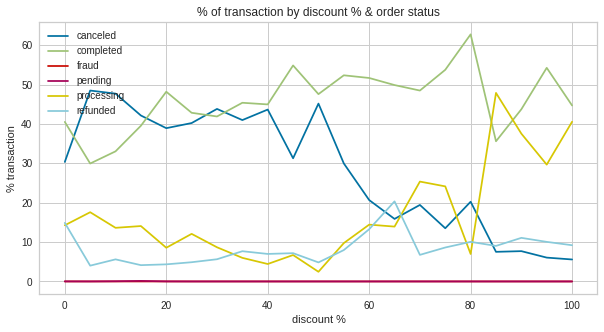

In [74]:
df2['discount_group'] = pd.cut(df2["discount_rate"],bins=[-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
                              labels=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])

disc_status = (100*df2.groupby(['discount_group','status_new'])['status_new'].count() / df2.groupby(['discount_group'])['status_new'].count()).rename("ratio").reset_index()
disc_status['discount_group'] = disc_status.discount_group.astype('int')

plt.figure(figsize=(10,5))
sns.lineplot(x='discount_group',y='ratio',hue='status_new',data=disc_status)
plt.ylabel('% transaction')
plt.xlabel('discount %')
plt.title('% of transaction by discount % & order status')
plt.legend()
plt.show()

# There are obvious trends in order status 'canceled', 'completed'/'processing', which we will look into below

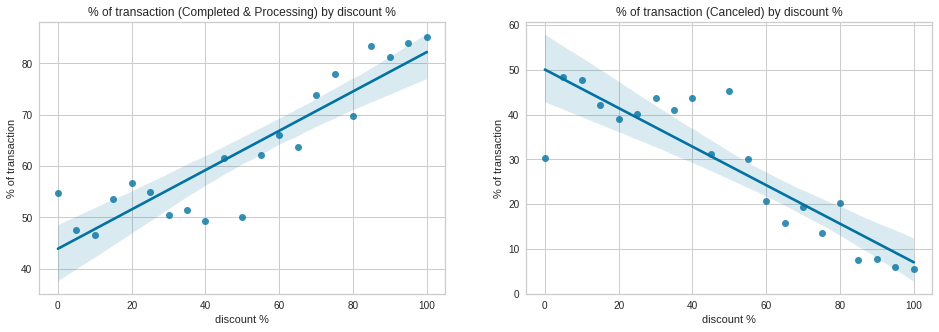

In [75]:
fig_data1=disc_status[(disc_status.status_new=='completed')|(disc_status.status_new=='processing')]
fig_data1=fig_data1.groupby(['discount_group'])['ratio'].sum().reset_index()
fig_data2=disc_status[(disc_status.status_new=='canceled')]

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.regplot(x='discount_group',y='ratio',data=fig_data1)
plt.ylabel('% of transaction')
plt.xlabel('discount %')
plt.title('% of transaction (Completed & Processing) by discount %')

plt.subplot(122)
sns.regplot(x='discount_group',y='ratio',data=fig_data2)
plt.ylabel('% of transaction')
plt.xlabel('discount %')
plt.title('% of transaction (Canceled) by discount %')
plt.show()

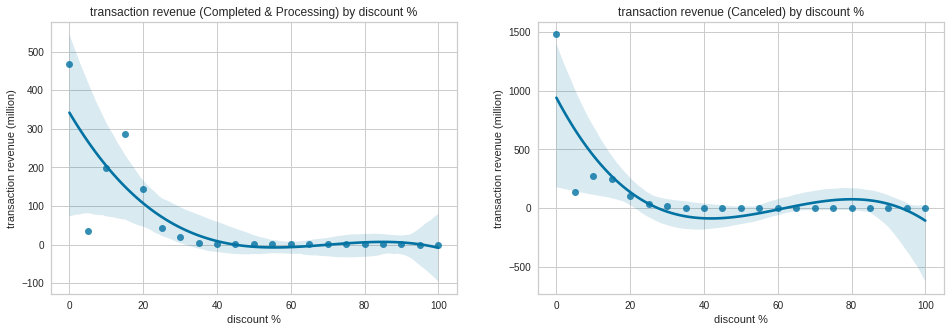

In [76]:
disc_revenue = (df2.groupby(['discount_group','status_new'])['grand_item'].sum()/1e6).reset_index()
disc_revenue['discount_group'] = disc_revenue.discount_group.astype('int')

fig_data3=disc_revenue[(disc_status.status_new=='completed')|(disc_status.status_new=='processing')]
fig_data3=fig_data3.groupby(['discount_group'])['grand_item'].sum().reset_index()
fig_data4=disc_revenue[(disc_status.status_new=='canceled')]

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.regplot(x='discount_group',y='grand_item',data=fig_data3,order=3)
plt.ylabel('transaction revenue (million)')
plt.xlabel('discount %')
plt.title('transaction revenue (Completed & Processing) by discount %')

plt.subplot(122)
sns.regplot(x='discount_group',y='grand_item',data=fig_data4,order=3)
plt.ylabel('transaction revenue (million)')
plt.xlabel('discount %')
plt.title('transaction revenue (Canceled) by discount %')
plt.show()

**Observations:**
- for completed and processing orders, 99% of revenues came from discount % <= 30%, 80% of revenues came from discount % <= 15%
- similarly for canceled orders, 99% of revenues came from discount % <= 30%, 80% of revenues came from discount % <= 10%
                                      
Note: total completed/processing revenues were 1205 million, whereas canceled revenues were 2308 million. i.e. almost double the amounts of completed/processing


---

---
##Summary of further intresting concepts and insights (not presented above)

In [107]:
print("Summary of insights from: 'RFM Customer Segments and Base model results' (see end of document from Step4) valuable to add")

Summary of insights from: 'RFM Customer Segments and Base model results' (see end of document from Step4) valuable to add
